In [2]:
import numpy as np
import matplotlib.pyplot as plt

from modules.game import Game
from modules.node import CongklakNode
from modules.state import CongklakState
from modules.strategies import (
    simple_strategy,
    random_strategy,
    maximize_house_strategy
)

%load_ext autoreload
%autoreload 2

- Kalo berhenti di rumah sendiri
    - bonus move
- Kalo berhenti di lubang sendiri
    - kalo kosong, ambil punya lawan & kita (1), giliran stop
    - kalo ada, ambil yg di situ doang, lanjut lagi
- Kalo berhenti di lubang lawan
    - kalo kosong, berhenti
    - kalo ada, ambil yg di situ doang, lanjut lagi

# Run

In [5]:
def print_path(game):
    cur_node = game.final_node
    path = [cur_node]
    while cur_node.parent != cur_node.node_id:
        cur_node = game.node_list[cur_node.parent]
        path.append(cur_node)

    print('Path to final state:')
    path = list(reversed(path))
    for i, node in enumerate(path):
        if i > 0:
            print(f'Choose action: {node.action}, result:')
        print(f'\n> Now turn of', node.state)
    print('Finish')

In [3]:
state = CongklakState()
print(state)

state = state.action(1)
print(state)

state = state.action(2)
print(state)

Player: 0, board:
[[0 7 7 7 7 7 7 7]
 [0 7 7 7 7 7 7 7]]
Player: 1, board:
[[1 0 8 8 8 8 8 8]
 [0 0 8 8 8 8 8 8]]
Player: 0, board:
[[ 1  1  4  0 15 15 15  1]
 [13  7  3  0  1  3  2 15]]


In [17]:
player = 0
print_every = 100_000

np.random.seed(0)
initial_state = CongklakState(player=player, holes=7, init_beads=7)
game = Game(
    policies=[random_strategy, random_strategy],
    initial_state=initial_state,
    print_every=print_every,
    player=player,
    verbose=True,
    max_total_visited_states=2
)

game.play()

[RESULT]
> Total observed states: 3
> Final state:
Player: 1, board:
[[ 2 11 11 11  2  0 11 11]
 [ 3 10  0  2 11  1 11  1]]
> Winner: player 0 with 59 beads!!
> Total steps to win: 2


In [18]:
print_path(game)

Path to final state:

> Now turn of Player: 0, board:
[[0 7 7 7 7 7 7 7]
 [0 7 7 7 7 7 7 7]]
Choose action: 5, result:

> Now turn of Player: 1, board:
[[2 8 8 8 8 0 8 8]
 [0 8 8 8 8 0 8 8]]
Choose action: 3, result:

> Now turn of Player: 1, board:
[[ 2 11 11 11  2  0 11 11]
 [ 3 10  0  2 11  1 11  1]]
Finish


In [22]:
board = np.array([
    [2, 8, 8, 8, 8, 0, 8, 8],
    [0, 8,8,8,8, 0, 8, 8]
])
state = CongklakState(player=1, board=board, verbose=False)
state = state.action(3)
state

Player: 1, board:
[[ 2 11 11 11  2  0 11 11]
 [ 3 10  0  2 11  1 11  1]]

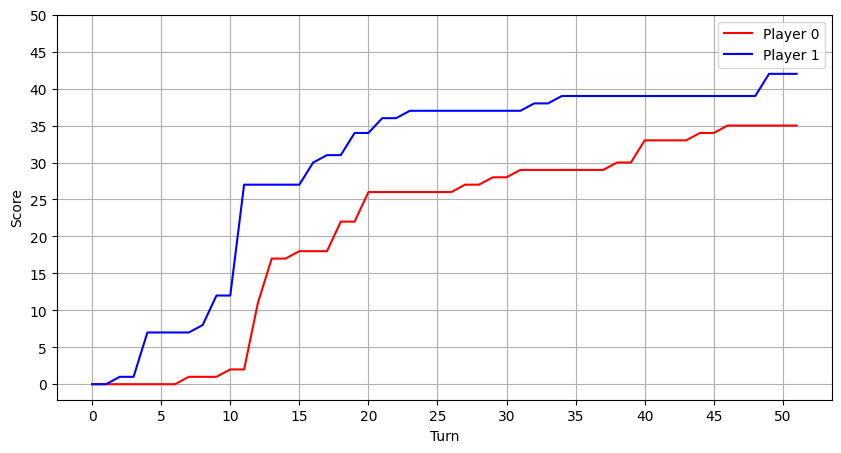

In [ ]:
player_score_list = []
for node in path:
    state = node.state
    player_score_list.append((state.player, state.board[state.player, 0]))

score_turn_list = np.zeros((len(player_score_list), 2), dtype=np.int32)
for i, (player, score) in enumerate(player_score_list):
    score_turn_list[i, player] = score
    score_turn_list[i, 1 - player] = score_turn_list[i - 1, 1 - player]

plt.figure(figsize=(10, 5))
plt.plot(score_turn_list[:, 0], label='Player 0', color='red')
plt.plot(score_turn_list[:, 1], label='Player 1', color='blue')
plt.legend()
plt.xticks(np.arange(0, len(score_turn_list), 5))
plt.yticks(np.arange(0, 55, 5))
plt.xlabel('Turn')
plt.ylabel('Score')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()